<a href="https://colab.research.google.com/github/OmarAboElnaga/Students-Score-and-their-Habits/blob/main/Students'_Scores_and_their_habits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency



In [ ]:
df =pd.read_csv( "https://raw.githubusercontent.com/OmarAboElnaga/Students-Score-and-their-Habits/main/student_habits_performance.csv")
df.head(5)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
df.isna().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [ ]:
df = df.drop('parental_education_level', axis=1)

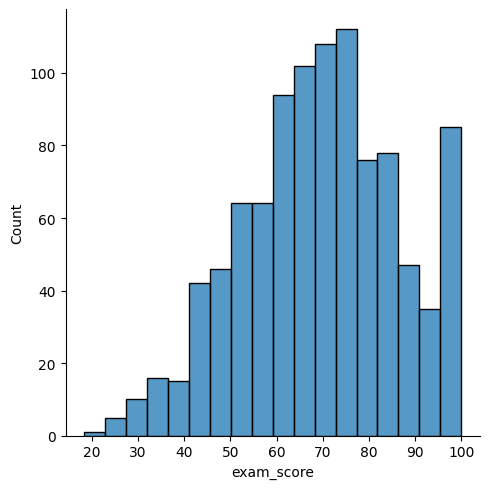

In [ ]:
sns.displot(df.exam_score)

In [ ]:
def group_exam_scores(df, score_column='exam_score'):
    bins = [0, 50, 60, 70, 80, 90, 99.9,100]
    labels = ['F', 'D', 'C', 'B', 'A', 'A+','Full Mark']
    df['score_group'] = pd.cut(df[score_column], bins=bins, labels=labels, right=True, include_lowest=True)
    return df
df = group_exam_scores(df)
print(df['score_group'].value_counts())

score_group
B            234
C            208
D            151
A            151
F            131
A+            77
Full Mark     48
Name: count, dtype: int64


In [ ]:
df['Wasted_Time'] = df['netflix_hours']+ df['social_media_hours']

In [ ]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,internet_quality,mental_health_rating,extracurricular_participation,exam_score,score_group,Wasted_Time
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Average,8,Yes,56.2,D,2.3
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,Average,8,No,100.0,Full Mark,5.1
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,Poor,1,No,34.3,F,4.4
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Good,1,Yes,26.8,F,4.9
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Good,1,No,66.4,C,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,Good,6,Yes,76.1,B,2.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,Average,6,Yes,65.9,C,3.4
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Good,9,Yes,64.4,C,3.9
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Average,1,No,69.7,C,5.2


In [ ]:
df.to_csv("examScores.csv", index=False)

## Data cleaning

In [ ]:
df = df.drop(['student_id' ,'social_media_hours' , 'netflix_hours'] , axis=1)

In [ ]:
df

,age,gender,study_hours_per_day,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,internet_quality,mental_health_rating,extracurricular_participation,exam_score,score_group,Wasted_Time
0,23,Female,0.0,No,85.0,8.0,Fair,6,Average,8,Yes,56.2,D,2.3
1,20,Female,6.9,No,97.3,4.6,Good,6,Average,8,No,100.0,Full Mark,5.1
2,21,Male,1.4,No,94.8,8.0,Poor,1,Poor,1,No,34.3,F,4.4
3,23,Female,1.0,No,71.0,9.2,Poor,4,Good,1,Yes,26.8,F,4.9
4,19,Female,5.0,No,90.9,4.9,Fair,3,Good,1,No,66.4,C,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,Female,2.6,No,77.0,7.5,Fair,2,Good,6,Yes,76.1,B,2.1
996,17,Female,2.9,Yes,86.0,6.8,Poor,1,Average,6,Yes,65.9,C,3.4
997,20,Male,3.0,No,61.9,6.5,Good,5,Good,9,Yes,64.4,C,3.9
998,24,Male,5.4,Yes,100.0,7.6,Fair,0,Average,1,No,69.7,C,5.2


## Hypothesis Testing

#### 1st Test
###### Wasted Time & Study Time
###### Test Used : Pearoson Correlation Test
###### Null Hypothesis : There is no linear correlation between Wasted Time and Study Time.
###### Alternative Hypothesis : There is a negative correlation between Wasted Time and Study Time.


In [ ]:
wasted_time = df[]

#### 2nd Test
##### A healthy mind in healthy body
##### Mental Health vs Diet
##### Test Used: Anova Test
##### Null hypothesis: Mean mental health are equal across levels of diet_quality
##### Alternative hypothesis: Mean mental health are different across different types of diet qualities

#### 3nd Test
##### A healthy mind in healthy body
##### Mental Health vs Exercise
##### Test Used: Pearson Correlation Test
##### Null hypothesis: There is no correlation between number of exercising hours and mental heath
##### Alternative hypothesis: There is a positive correlation between number of exercising hours and mental heath

#### 4th Test
##### Study hours affects your Exam grades
##### Test Used: Pearson Correlation Test
##### Null hypothesis: There is no correlation between study hours and exam grades
##### Alternative hypothesis: There is a positive correlation between study hours and exam




#### 5th test
##### Mental Health affects your Exam Grades
##### Test Used: Pearson
##### Null hypothesis: There is no correlation between mental health rating and exam score.
##### Alternative hypothesis: Mental health rating is positively related correlated with the final exam score.

In [ ]:
mental_health = df['mental_health_rating']
exam_scores = df['exam_score']
correlation, p_val = pearsonr(mental_health, exam_scores)

print("Correlation coefficient:", correlation)
print("p-value:", p_val)

Correlation coefficient: 0.32152293065514603
p-value: 1.752646701164105e-25


Since the P-value is extremely small we can successfully reject the null hypothesis and that there is an positive correlation

#### 6th test
##### Is Attendance Really That Important
##### Test Used: Pearson Correlation Test
##### Null hypothesis: There is no correlation between attendance and exam grades
##### Alternative hypothesis: There is a positive correlation between attendance and exam grades

Correlation coefficient: -0.23763123167240488
p-value: 2.6473295497128505e-14


Since the P-value is extremely small we can successfully reject the null hypothesis and that there is an negative correlation

#### 7th Test
##### Who is the smartest?
##### Test Used: T-Test
##### Null hypothesis: Propotion of Males and Females regarding Fullmark & A+ is equal
##### Alternative hypothesis: Propotion of Males and Females regarding Fullmark & A+ is not equal

## Visualisation

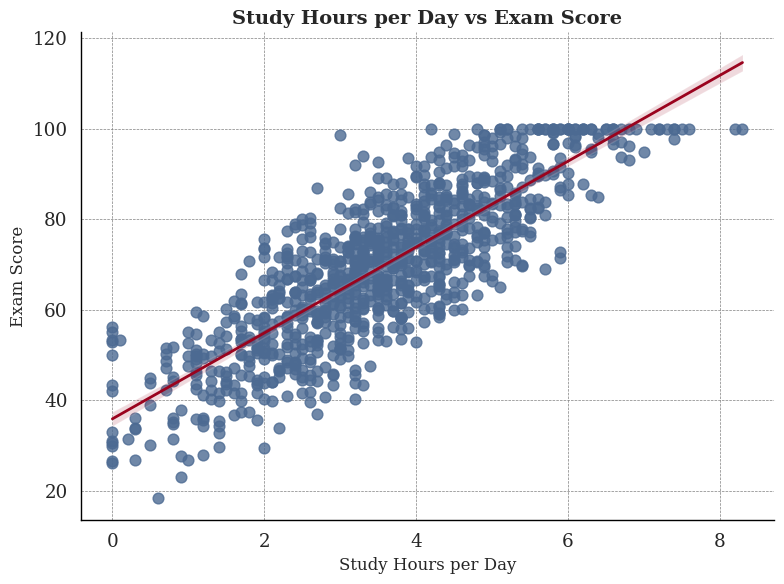

In [ ]:
sns.set_style("whitegrid")
plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "font.family": "serif",
    "axes.edgecolor": "black",
    "axes.linewidth": 1,
    "grid.color": "gray",
    "grid.linestyle": "--",
    "grid.linewidth": 0.5
})

point_color = "#4C6A92"
line_color = "#9A031E"

plt.figure(figsize=(8, 6))
sns.regplot(
    x='study_hours_per_day',
    y='exam_score',
    data=df,
    scatter_kws={'alpha': 0.8, 'color': point_color, 's': 60},
    line_kws={'color': line_color, 'linewidth': 2}
)
plt.title('Study Hours per Day vs Exam Score', weight='bold')
plt.xlabel('Study Hours per Day')
plt.ylabel('Exam Score')
sns.despine()
plt.tight_layout()
plt.show()